In [1]:
pip install yfinance

1. Initial Comparative Analysis of Industrial Automation Companies
The first part of the notebook compares several major players in the industrial automation market:

Schneider Electric (SU.PA)
Siemens (SIE.DE)
ABB (ABBN.SW)
Eaton (ETN)

This analysis includes:

Stock price trends from 2020 to 2024
Volatility comparison (with Eaton showing the highest volatility at 2.05%)
Correlation heatmap of daily returns showing how these companies' stocks move in relation to each other

[*********************100%***********************]  4 of 4 completed


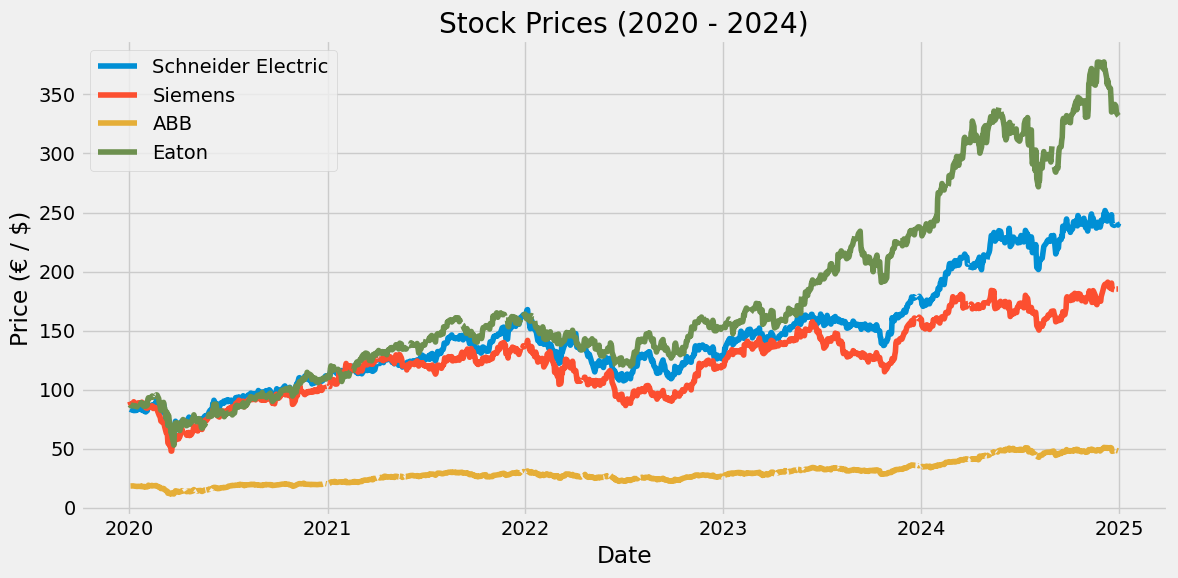

<ipython-input-36-2fd0394b9329>:37: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = close_prices.pct_change().dropna()


In [36]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tickers = {
    'Schneider Electric': 'SU.PA',    # Paris
    'Siemens': 'SIE.DE',              # Germany
    'ABB': 'ABBN.SW',                 # Switzerland
    'Eaton': 'ETN'                    # NYSE
}

raw_data = yf.download(
    list(tickers.values()),
    start="2020-01-01",
    end="2025-01-01",
    group_by='ticker',
    auto_adjust=True
)

close_prices = pd.DataFrame({
    company: raw_data[ticker]['Close']
    for company, ticker in tickers.items()
    if ticker in raw_data.columns or ticker in raw_data
})
plt.figure(figsize=(12, 6))
for column in close_prices.columns:
    plt.plot(close_prices[column], label=column)
plt.title('Stock Prices (2020 - 2024)')
plt.xlabel('Date')
plt.ylabel('Price (€ / $)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

returns = close_prices.pct_change().dropna()

In [35]:
volatility = returns.std() * 100
print("\n📉 Volatility (% daily std dev):\n")
print(volatility.sort_values(ascending=False))


📉 Volatility (% daily std dev):

Eaton                 2.047038
Siemens               1.937719
Schneider Electric    1.810866
ABB                   1.613309
dtype: float64


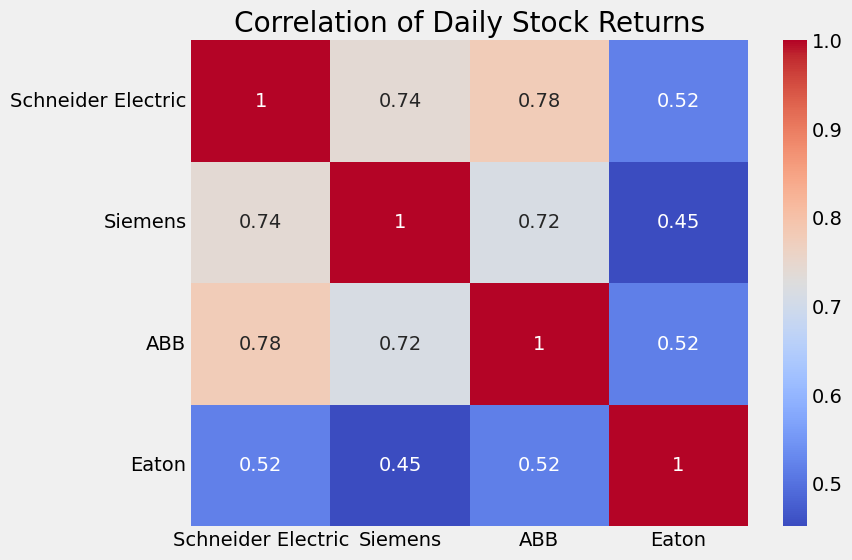

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Daily Stock Returns")
plt.show()

In [10]:
pip install yfinance pandas matplotlib seaborn plotly requests beautifulsoup4 vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


2. LSTM Model for Schneider Electric Stock Price Prediction
A Long Short-Term Memory (LSTM) neural network was built to predict Schneider Electric's stock prices:

Data preprocessing with MinMaxScaler to normalize values
Sequence creation with a 60-day lookback window
Model architecture with two LSTM layers with dropout regularization
Training across 20 epochs
Visualization of actual vs. predicted prices

In [13]:
import yfinance as yf
import pandas as pd

data = yf.download("SU.PA", start="2015-01-01", end="2025-01-01")
data = data[['Close']]
data.dropna(inplace=True)
data.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,SU.PA
Date,
2024-12-23,239.100006
2024-12-24,239.800003
2024-12-27,241.050003
2024-12-30,239.399994
2024-12-31,240.899994


3. Prophet Model Implementation
The notebook shows attempts at implementing Facebook's Prophet model for time series forecasting:

Initial errors with timezone handling were encountered and resolved
Successful implementation generated forecasts for 30 days ahead
Final Prophet forecast showed Schneider Electric's price trending upward, reaching around 251 by late January 2025
Forecast components were visualized to show trend and seasonality patterns

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length=60):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

X_lstm = X.reshape(X.shape[0], X.shape[1], 1)

split = int(len(X) * 0.8)
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y[:split], y[split:]

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0123
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 6.6440e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 7.0621e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.8447e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 5.2812e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 5.5919e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.3882e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.7224e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 5.4011e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.8388e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 4.8994e-04
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 4.2942e-04
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.4287e-04
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 4.6242e-04
Epoch 15/20
63/63 ━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


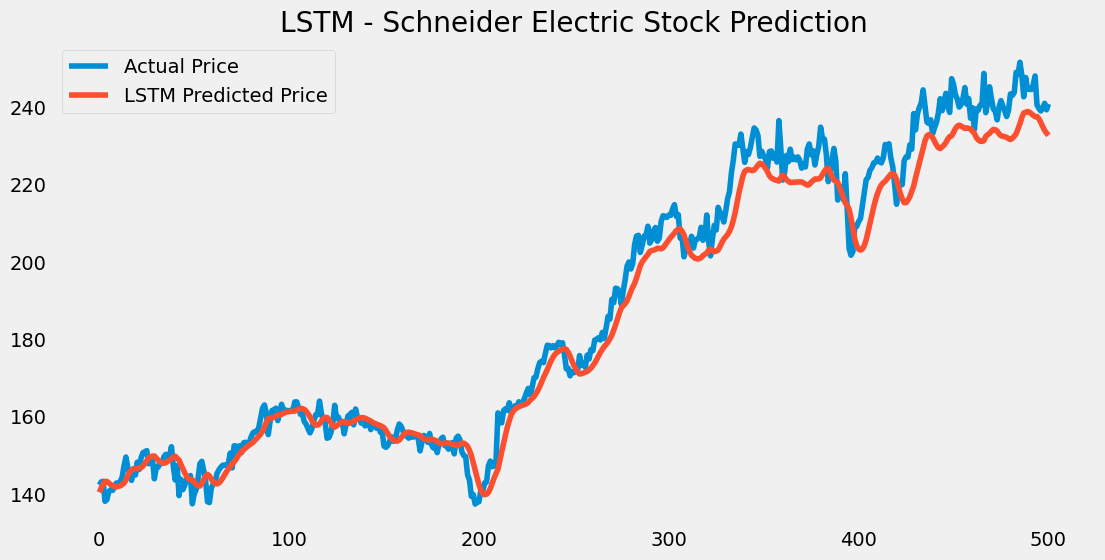

In [32]:
lstm_preds = lstm_model.predict(X_test)
lstm_preds = scaler.inverse_transform(lstm_preds.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(lstm_preds, label='LSTM Predicted Price')
plt.title('LSTM - Schneider Electric Stock Prediction')
plt.legend()
plt.grid()
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_inv, lstm_preds)
mse = mean_squared_error(y_test_inv, lstm_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, lstm_preds)

print("Evaluation Metrics for LSTM Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Evaluation Metrics for LSTM Model:
Mean Absolute Error (MAE): 4.71
Mean Squared Error (MSE): 36.85
Root Mean Squared Error (RMSE): 6.07
R² Score: 0.97


In [20]:
import yfinance as yf
import pandas as pd

# Load Schneider Electric data
df = yf.download("SU.PA", start="2015-01-01", end="2025-01-01")
df.reset_index(inplace=True)

# Prophet expects 'ds' and 'y' columns
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
data.dropna(inplace=True)
data.tail()

[*********************100%***********************]  1 of 1 completed


Price,ds,y
Ticker,,SU.PA
2556,2024-12-23,239.100006
2557,2024-12-24,239.800003
2558,2024-12-27,241.050003
2559,2024-12-30,239.399994
2560,2024-12-31,240.899994


4. Comprehensive Technical Analysis Dashboard
The final section creates an extensive technical analysis dashboard with:

Price chart with 50-day and 200-day moving averages
Bollinger Bands (20,2)
RSI (Relative Strength Index)
MACD (Moving Average Convergence Divergence)
30-day rolling volatility
Cumulative and daily returns

Key Statistics for Schneider Electric:

Average Daily Return: 0.08%
Volatility: 1.67%
Maximum Drawdown: -38.23%
Best Day Return: 12.01%
Worst Day Return: -14.02%
Positive Days Percentage: 53.32%
Current Price (as of analysis): 239.4
RSI: 31.48 (potentially indicating oversold conditions)
Price is above the 200-day moving average, generally considered a bullish indicator

The analysis demonstrates multiple approaches to analyzing stock price data, from comparative industry analysis to predictive modeling with both deep learning (LSTM) and statistical forecasting (Prophet) approaches, complemented by traditional technical analysis indicators.

Price Chart with 50-day and 200-day Moving Averages
What they are:

50-day Moving Average (SMA 50): The average closing price over the past 50 trading days
200-day Moving Average (SMA 200): The average closing price over the past 200 trading days

What they tell us for Schneider Electric:

The current price (239.4) is above the 200-day MA (228.06) but slightly below the 50-day MA (242.22)
When price is above the 200-day MA, it generally indicates a long-term uptrend
The relationship between these moving averages is often watched for "golden crosses" (50-day crossing above 200-day, bullish) and "death crosses" (50-day crossing below 200-day, bearish)
The price being below the 50-day MA but above the 200-day MA suggests a possible short-term pullback within a longer-term uptrend

Bollinger Bands (20,2)
What they are:

A set of three lines: a 20-day simple moving average (middle band) with upper and lower bands set at 2 standard deviations from this average
The bands expand during periods of high volatility and contract during periods of low volatility

What they tell us:

When price touches or breaks the upper band, the stock might be overbought
When price touches or breaks the lower band, the stock might be oversold
A long period of tight bands often precedes a significant price move (either up or down)
From the visualization, we can see how Schneider Electric's price has interacted with these bands, with periods of price hitting the upper band (potentially overbought) and lower band (potentially oversold)

RSI (Relative Strength Index)
What it is:

A momentum oscillator that measures the speed and change of price movements
Calculated using the ratio of average gains to average losses over a specified period (typically 14 days)
Ranges from 0 to 100

What it tells us for Schneider Electric:

The current RSI is 31.48, which is approaching oversold territory (typically considered below 30)
An RSI below 30 suggests the stock may be oversold and due for a potential rebound
An RSI above 70 suggests the stock may be overbought and due for a potential pullback
The current reading suggests Schneider Electric may be nearing oversold conditions

MACD (Moving Average Convergence Divergence)
What it is:

A trend-following momentum indicator showing the relationship between two moving averages
Calculated by subtracting the 26-day EMA from the 12-day EMA
Includes a signal line (typically 9-day EMA of the MACD line) and a histogram showing the difference between MACD and signal line

What it tells us:

When the MACD crosses above the signal line, it's a potential buy signal
When the MACD crosses below the signal line, it's a potential sell signal
The histogram shows momentum: expanding histogram bars indicate increasing momentum in the direction of the move
Zero line crossovers can indicate major trend changes
From the chart, we can analyze recent MACD crossovers and histogram patterns to understand momentum shifts in Schneider Electric's stock

30-day Rolling Volatility
What it is:

A measure of the dispersion of returns for Schneider Electric over a 30-day period
Calculated as the standard deviation of daily returns over the past 30 days

What it tells us:

Higher values indicate greater price fluctuations and higher risk
Lower values indicate more stable price movement
Spikes in volatility often coincide with market uncertainty or major news events
The chart shows periods of both high and low volatility for Schneider Electric, with notable spikes likely corresponding to significant market events

Cumulative and Daily Returns
What they are:

Daily Returns: The percentage change in price from one trading day to the next
Cumulative Returns: The total percentage gain or loss over time, starting from a baseline

What they tell us for Schneider Electric:

The average daily return is positive at 0.08%, indicating an overall upward trend
53.32% of trading days showed positive returns
The best single-day return was 12.01%, while the worst was -14.02%
The cumulative return chart shows the overall growth trajectory of an investment in Schneider Electric
From the daily returns chart, we can identify periods of high volatility (large green and red bars) versus more stable periods

Overall Market Status for Schneider Electric:
Based on these indicators, Schneider Electric appears to be in a long-term uptrend (above 200-day MA) but experiencing a short-term pullback (below 50-day MA with RSI approaching oversold territory). The technical setup suggests watching for potential reversal signals that could indicate a buying opportunity within the broader uptrend.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu_cb6unh/dysad9k6.json


Original data:
                        Date  Schneider_Electric
0  2015-01-02 00:00:00+01:00           46.992912
1  2015-01-05 00:00:00+01:00           44.947021
2  2015-01-06 00:00:00+01:00           45.009731
3  2015-01-07 00:00:00+01:00           45.291924
4  2015-01-08 00:00:00+01:00           47.157528
Data shape: (2560, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpu_cb6unh/357eax3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13083', 'data', 'file=/tmp/tmpu_cb6unh/dysad9k6.json', 'init=/tmp/tmpu_cb6unh/357eax3w.json', 'output', 'file=/tmp/tmpu_cb6unh/prophet_modelrig_ktd_/prophet_model-20250408072130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecast plots saved as 'schneider_forecast.png' and 'schneider_components.png'

Predicted Prices for the Next 30 Days:
                      ds        yhat  yhat_lower  yhat_upper
2560 2024-12-30 23:00:00  247.500897  239.289947  255.530180
2561 2024-12-31 23:00:00  247.703298  239.600417  256.359095
2562 2025-01-01 23:00:00  247.915321  239.721383  256.494404
2563 2025-01-02 23:00:00  247.888157  239.406819  257.058973
2564 2025-01-03 23:00:00  245.753933  237.184797  254.167487
2565 2025-01-04 23:00:00  247.814437  239.354260  256.764442
2566 2025-01-05 23:00:00  247.987380  239.369848  256.556856
2567 2025-01-06 23:00:00  248.146779  240.068364  256.459398
2568 2025-01-07 23:00:00  248.318888  239.176582  256.933627
2569 2025-01-08 23:00:00  248.507609  240.452149  257.374319
2570 2025-01-09 23:00:00  248.464674  240.319419  256.715210
2571 2025-01-10 23:00:00  246.322625  237.877637  254.752879
2572 2025-01-11 23:00:00  248.383533  239.955353  256.985313
2573 2025-01-12 23:00:00 

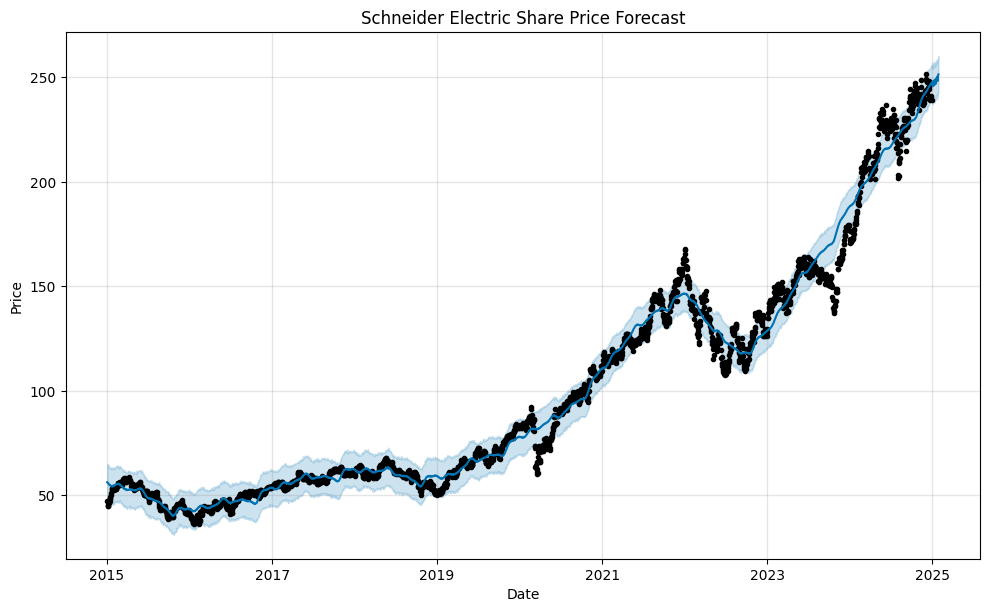

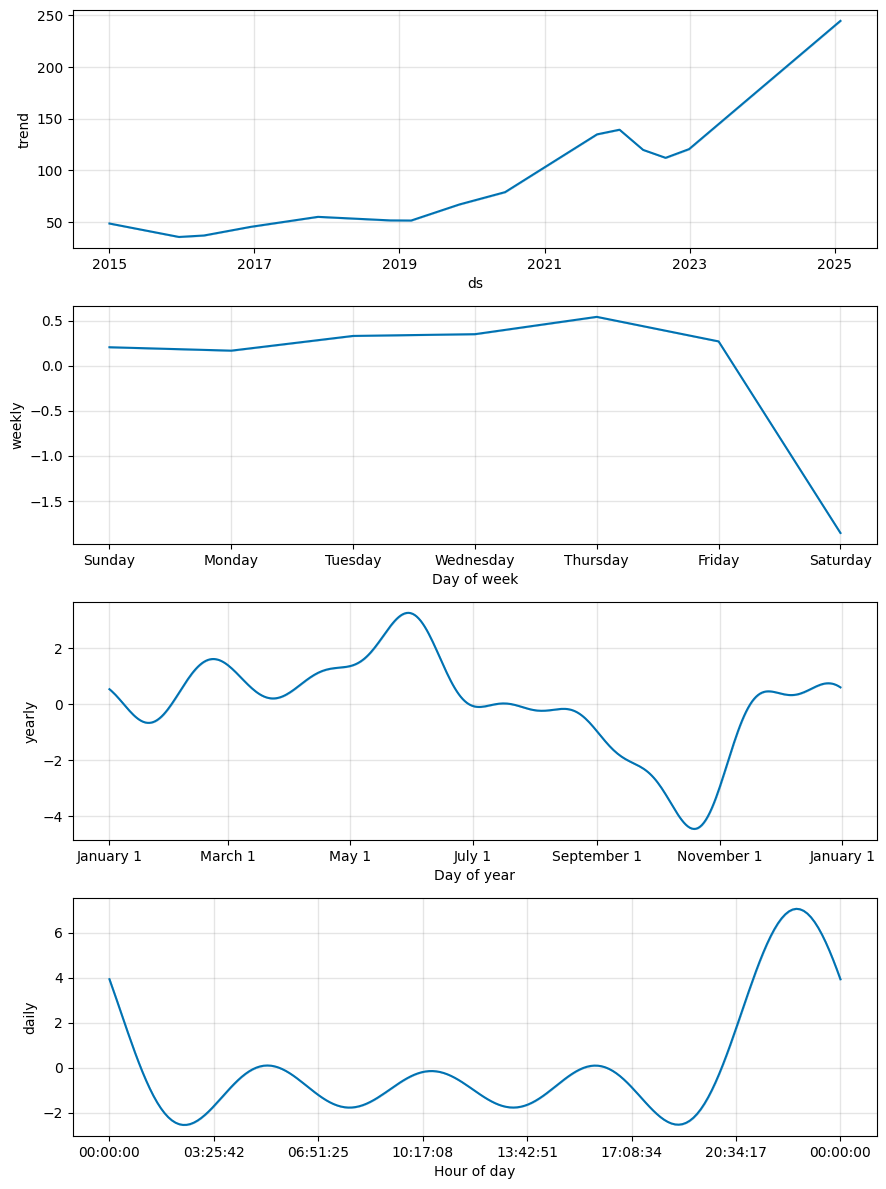

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np

file_path = 'financial_data/Schneider_Electric.csv'
df = pd.read_csv(file_path)

print("Original data:")
print(df.head())
print(f"Data shape: {df.shape}")


df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True).dt.tz_localize(None)

prophet_df = df.rename(columns={'Date': 'ds', 'Schneider_Electric': 'y'})

prophet_df = prophet_df[['ds', 'y']]

model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Schneider Electric Share Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('schneider_forecast.png')

fig2 = model.plot_components(forecast)
plt.savefig('schneider_components.png')

print("\nForecast plots saved as 'schneider_forecast.png' and 'schneider_components.png'")

print("\nPredicted Prices for the Next 30 Days:")
future_only = forecast[forecast['ds'] > prophet_df['ds'].max()]
print(future_only[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(30))

TA-Lib not available. Using alternative calculations for technical indicators.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


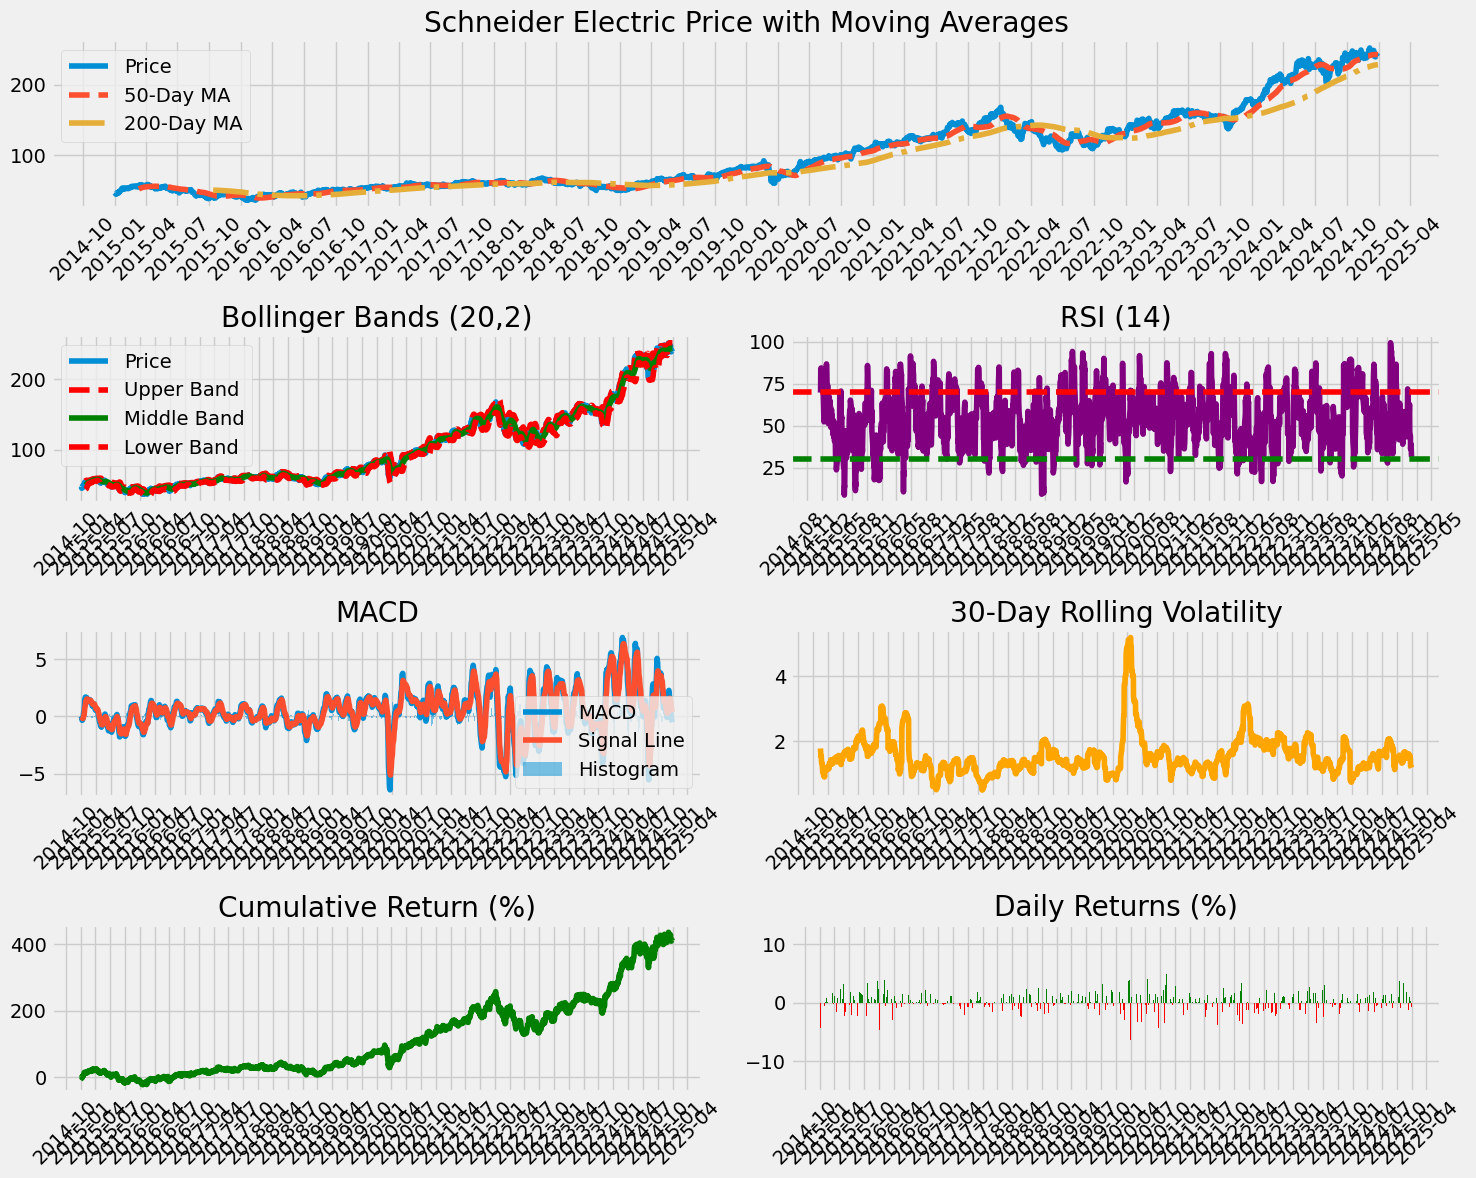

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import seaborn as sns


try:
    import talib
    talib_available = True
except ImportError:
    talib_available = False
    print("TA-Lib not available. Using alternative calculations for technical indicators.")

file_path = 'financial_data/Schneider_Electric.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True).dt.tz_localize(None)
df.set_index('Date', inplace=True)

df['Daily_Return'] = df['Schneider_Electric'].pct_change() * 100
df['Cumulative_Return'] = (1 + df['Daily_Return']/100).cumprod() - 1

df['SMA_50'] = df['Schneider_Electric'].rolling(window=50).mean()
df['SMA_200'] = df['Schneider_Electric'].rolling(window=200).mean()
df['EMA_20'] = df['Schneider_Electric'].ewm(span=20, adjust=False).mean()

if talib_available:
    # Using TA-Lib
    df['RSI'] = talib.RSI(df['Schneider_Electric'], timeperiod=14)
    macd, macdsignal, macdhist = talib.MACD(df['Schneider_Electric'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_Signal'] = macdsignal
    df['MACD_Hist'] = macdhist

    df['BB_Upper'], df['BB_Middle'], df['BB_Lower'] = talib.BBANDS(
        df['Schneider_Electric'],
        timeperiod=20,
        nbdevup=2,
        nbdevdn=2,
        matype=0)
else:
    delta = df['Schneider_Electric'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    exp1 = df['Schneider_Electric'].ewm(span=12, adjust=False).mean()
    exp2 = df['Schneider_Electric'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']

    df['BB_Middle'] = df['Schneider_Electric'].rolling(window=20).mean()
    df['BB_Upper'] = df['BB_Middle'] + 2 * df['Schneider_Electric'].rolling(window=20).std()
    df['BB_Lower'] = df['BB_Middle'] - 2 * df['Schneider_Electric'].rolling(window=20).std()

df['Volatility_30D'] = df['Daily_Return'].rolling(window=30).std()

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(4, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df.index, df['Schneider_Electric'], label='Price')
ax1.plot(df.index, df['SMA_50'], label='50-Day MA', linestyle='--')
ax1.plot(df.index, df['SMA_200'], label='200-Day MA', linestyle='-.')
ax1.set_title('Schneider Electric Price with Moving Averages')
ax1.legend()
ax1.grid(True)

# Bollinger Bands
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(df.index, df['Schneider_Electric'], label='Price')
ax2.plot(df.index, df['BB_Upper'], label='Upper Band', linestyle='--', color='r')
ax2.plot(df.index, df['BB_Middle'], label='Middle Band', linestyle='-', color='g')
ax2.plot(df.index, df['BB_Lower'], label='Lower Band', linestyle='--', color='r')
ax2.set_title('Bollinger Bands (20,2)')
ax2.legend()
ax2.grid(True)

# RSI
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(df.index, df['RSI'], color='purple')
ax3.axhline(y=70, color='r', linestyle='--')
ax3.axhline(y=30, color='g', linestyle='--')
ax3.set_title('RSI (14)')
ax3.grid(True)

# MACD
ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(df.index, df['MACD'], label='MACD')
ax4.plot(df.index, df['MACD_Signal'], label='Signal Line')
ax4.bar(df.index, df['MACD_Hist'], label='Histogram', alpha=0.5)
ax4.set_title('MACD')
ax4.legend()
ax4.grid(True)

# Volatility
ax5 = fig.add_subplot(gs[2, 1])
ax5.plot(df.index, df['Volatility_30D'], color='orange')
ax5.set_title('30-Day Rolling Volatility')
ax5.grid(True)

# Returns
ax6 = fig.add_subplot(gs[3, 0])
ax6.plot(df.index, df['Cumulative_Return'] * 100, color='green')
ax6.set_title('Cumulative Return (%)')
ax6.grid(True)

# Daily Returns
ax7 = fig.add_subplot(gs[3, 1])
ax7.bar(df.index, df['Daily_Return'], color=np.where(df['Daily_Return'] > 0, 'green', 'red'))
ax7.set_title('Daily Returns (%)')
ax7.grid(True)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('schneider_technical_analysis.png', dpi=300)
plt.show()

stats_df = pd.DataFrame({
    'Metric': ['Average Daily Return (%)', 'Volatility (%)', 'Max Drawdown (%)',
              'Best Day (%)', 'Worst Day (%)', 'Positive Days (%)', 'Current Price',
              'SMA 50', 'SMA 200', 'RSI', 'Above 200 SMA?'],
    'Value': [
        round(df['Daily_Return'].mean(), 2),
        round(df['Daily_Return'].std(), 2),
        round((df['Schneider_Electric'] / df['Schneider_Electric'].expanding().max() - 1).min() * 100, 2),
        round(df['Daily_Return'].max(), 2),
        round(df['Daily_Return'].min(), 2),
        round(len(df[df['Daily_Return'] > 0]) / len(df) * 100, 2),
        round(df['Schneider_Electric'].iloc[-1], 2),
        round(df['SMA_50'].iloc[-1], 2),
        round(df['SMA_200'].iloc[-1], 2),
        round(df['RSI'].iloc[-1], 2),
        "Yes" if df['Schneider_Electric'].iloc[-1] > df['SMA_200'].iloc[-1] else "No"
    ]
})

In [37]:
print("\nSchneider Electric - Key Statistics:")
print(stats_df)


Schneider Electric - Key Statistics:
                      Metric   Value
0   Average Daily Return (%)    0.08
1             Volatility (%)    1.67
2           Max Drawdown (%)  -38.23
3               Best Day (%)   12.01
4              Worst Day (%)  -14.02
5          Positive Days (%)   53.32
6              Current Price   239.4
7                     SMA 50  242.22
8                    SMA 200  228.06
9                        RSI   31.48
10            Above 200 SMA?     Yes
